# ABALONE REPORT DESCRIPTION
Abalone are large slow-growing marine snails. In many parts of the world they are an economically significant fishery as both commercial operations and a traditionally-important food source for many cultures.

Abalone are harvested from the wild rather than farmed, and sustainability of a slow-growing resources is an important issue. A key issue is determining the age of a specimen. The rigorous approach is to harvest and dissect the specimen to count growth rings in the flesh. Obviously, a reliable non-fatal means of estimating specimen age is highly desirable.

This dataset, provided as abalone_growth_data.csv, collects a large number of measurements on around 4000 harvested specimens and can be used to identify reliable predictors of the sample age.

As well as the spatial dimensions of the shell, the quantities provided include the whole weight, the shucked weight (ie. the mass of the flesh that is eaten), the shell weight, and the viscera weight (the non-edible organs that are discarded)


In [5]:
# Library loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## TASK 1: Initial loading [5 marks]
a. Download one of the datasets, and write code to read in the data to a Pandas DataFrame

b. Write code to print out the column headings provided in the datasets

In [6]:
# Loading the data file
marine_df = pd.read_csv('abalone_growth.csv')

# Column heading in the dataset
print('columns of the dataset:')
display(marine_df.columns)


columns of the dataset:


Index(['Sex', 'Length (mm)', 'Diameter (mm)', 'Height (mm)',
       'Whole weight (g)', 'Shucked weight (g)', 'Viscera weight (g)',
       'Shell weight (g)', 'Rings', 'Age (y)'],
      dtype='object')

In [7]:
# Get insight about the dataset 
print('Shape of the dataset:')
display(marine_df.shape)
# It means the dataset has total 4041 observation 
# after handling missing values and 10 attributes for each observation.

Shape of the dataset:


(4177, 10)

In [8]:
# Information about dataset 
print('Info of the dataset:')
display(marine_df.info())

Info of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sex                 4177 non-null   object 
 1   Length (mm)         4136 non-null   float64
 2   Diameter (mm)       4135 non-null   float64
 3   Height (mm)         4122 non-null   float64
 4   Whole weight (g)    4141 non-null   float64
 5   Shucked weight (g)  4141 non-null   float64
 6   Viscera weight (g)  4129 non-null   float64
 7   Shell weight (g)    4138 non-null   float64
 8   Rings               4133 non-null   float64
 9   Age (y)             4131 non-null   float64
dtypes: float64(9), object(1)
memory usage: 326.5+ KB


None

**Overview**

All the attributes are <span style='color: lightcoral'> numerical values </span>, apart from "Sex" attributes.
The Abalone dataset provides a wealth of information that can lead to valuable insights regarding the physical characteristics and age estimation of abalones.

**Dataset Structure**

The dataset consists of `4,177 entries` and `9 columns`, which include both `categorical and continuous` variables.
Physical Measurements

**The physical measurements** 

<span style='color: lightcoral'> Length, Diameter, Height, Whole Weight, Shucked Weight, Viscera Weight, Shell Weight </span>: are all continuous variables that can significantly influence the age estimation of abalones.


**Missing Values and Data Quality**

The dataset appears to have some missing value and non-sensical values across all columns, which is neccesary for cleaning data analysis steps as it ensures data integrity and reliability.

## TASK 2: Data cleaning [5 marks]
a. Unfortunately, all the datasets have been damaged and contain missing, nonsensical, or NaN fields. Write code to look for any problems with the data and remove problematic entries

b. In your report.pdf file, add a section named “Data Cleaning” which describes what data cleaning you have done, and what other cleaning might be possible

### Step 1: Handling missing value 

In [9]:
#check if missing value is existing in individual columns
marine_df.isnull().sum()

Sex                    0
Length (mm)           41
Diameter (mm)         42
Height (mm)           55
Whole weight (g)      36
Shucked weight (g)    36
Viscera weight (g)    48
Shell weight (g)      39
Rings                 44
Age (y)               46
dtype: int64

In [10]:
#check total value for each individual columns
marine_df.count()

Sex                   4177
Length (mm)           4136
Diameter (mm)         4135
Height (mm)           4122
Whole weight (g)      4141
Shucked weight (g)    4141
Viscera weight (g)    4129
Shell weight (g)      4138
Rings                 4133
Age (y)               4131
dtype: int64

Obseving that certain columns (such as Length (mm), Diameter (mm), Height (mm)) contain `approximately 1% or fewer missing values`. Upon further checking of the distribution of these columns, it becomes apparent that the data is considerably skewed, either to the right or left. Given that the total proportion of missing values is relatively low, I am considering the removal of rows with missing values in these columns to <span style='color: #0e6655'> maintain the integrity </span> of the dataset and <span style='color: #0e6655'> minimize potential distortions </span>.

Usually, we're looking for <Median> instead of <Mean> causes Mean affected too heavily by outliers => Not a good metrics to analyze and gain a valuable insight. 

[Save for numerical analysis]

In [11]:
# Drop columns whose missing values is less than 1%
marine_df.dropna(
    axis= 'index', 
    how= 'any', 
    subset= ['Length (mm)', 'Diameter (mm)', 'Height (mm)'], 
    inplace= True
)

# Check total of NA after dropping
print('Total of NA:\n',marine_df.isnull().sum())


Total of NA:
 Sex                    0
Length (mm)            0
Diameter (mm)          0
Height (mm)            0
Whole weight (g)      34
Shucked weight (g)    36
Viscera weight (g)    48
Shell weight (g)      38
Rings                 43
Age (y)               44
dtype: int64


For the rest of missing value, we considered to replace them with the average value

In [12]:
# Fill NA with average for each column
cols_to_fill = [
    'Height (mm)', 'Whole weight (g)',
    'Shucked weight (g)', 'Viscera weight (g)', 
    'Shell weight (g)', 'Rings', 'Age (y)'
]

marine_df[cols_to_fill] = marine_df[cols_to_fill].fillna(
    marine_df[cols_to_fill].mean()
)

#check missing value again
marine_df.isnull().sum()


Sex                   0
Length (mm)           0
Diameter (mm)         0
Height (mm)           0
Whole weight (g)      0
Shucked weight (g)    0
Viscera weight (g)    0
Shell weight (g)      0
Rings                 0
Age (y)               0
dtype: int64

In [13]:
# Calling out df after cleaning
marine_df

,Sex,Length (mm),Diameter (mm),Height (mm),Whole weight (g),Shucked weight (g),Viscera weight (g),Shell weight (g),Rings,Age (y)
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7.000000,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,-0.1415,0.2100,9.000000,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10.000000,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7.000000,8.5
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8.000000,9.5
...,...,...,...,...,...,...,...,...,...,...
4171,M,0.560,0.430,0.155,0.8675,0.4000,0.1720,0.2290,8.000000,9.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10.000000,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9.000000,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10.000000,11.5


Ater filling Na with the mean and removing all the missing value from three columns named "...", I erase total of 4177 - 4041 observations. We can see that our dataset is now free of all the missing values and after dropping the data the number of rows also <span style='color: #0e6655'> reduced from 4155 to 4041 </span>

The dataset can be divided into `numerical` and `categorical columns`:

`Numerical Columns:`

- Length

- Diameter

- Height

- Whole weight

- Shucked weight

- Viscera weight

- hell weight

- Rings

`Categorical Columns:`

- Sex


In [14]:
# Categorical data type unique values
print(
    'Total count of each unique value for categorical variable gender: '
)
display(marine_df['Sex'].value_counts())

Total count of each unique value for categorical variable gender: 


Sex
M    1476
I    1307
F    1258
Name: count, dtype: int64

### Step 2: Non-sensical values

<span style='color:rgb(6, 64, 52)'> Problems </span>: 

those measurements are to tell us about the appearance features of those marines but we observed some negative values for ratio data.

In [15]:
# Define negative value
numeric_cols = [
    'Length (mm)', 'Diameter (mm)', 
    'Height (mm)', 'Whole weight (g)',
    'Shucked weight (g)', 'Viscera weight (g)', 
    'Shell weight (g)', 'Rings', 'Age (y)']
negative_values = (marine_df[numeric_cols] < 0).any(axis=1)

# Call back nonsensical values to check
marine_df.loc[negative_values]

,Sex,Length (mm),Diameter (mm),Height (mm),Whole weight (g),Shucked weight (g),Viscera weight (g),Shell weight (g),Rings,Age (y)
2,F,0.530,0.420,0.135,0.6770,0.2565,-0.1415,0.2100,9.0,10.5
18,M,-0.365,0.295,0.080,0.2555,0.0970,0.0430,0.1000,7.0,8.5
39,M,0.355,0.290,0.090,0.3275,0.1340,-0.0860,0.0900,9.0,10.5
49,F,0.525,0.425,0.160,0.8355,0.3545,0.2135,-0.2450,9.0,10.5
51,M,0.400,0.320,0.095,0.3030,0.1335,0.0600,-0.1000,7.0,8.5
...,...,...,...,...,...,...,...,...,...,...
4130,M,0.580,0.450,0.140,0.8240,0.3465,0.1765,-0.2630,10.0,11.5
4151,I,0.350,0.250,0.075,0.1695,0.0835,0.0355,-0.0410,6.0,7.5
4159,F,0.560,0.440,0.135,0.8025,0.3500,0.1615,0.2590,-9.0,10.5
4163,I,0.390,0.310,0.085,-0.3440,0.1810,0.0695,0.0790,7.0,8.5


In [16]:
# Count total of negative value in each individual column
negative_values = (marine_df[numeric_cols] < 0)
negative_values.sum()

Length (mm)           45
Diameter (mm)         37
Height (mm)           40
Whole weight (g)      52
Shucked weight (g)    31
Viscera weight (g)    36
Shell weight (g)      40
Rings                 35
Age (y)               44
dtype: int64

When looking at distribution of each column, it is clearly that most of them is followed approxiamately normal distribution, i decided to <span style='color:rgb(38, 170, 144)'>replace all the negative values with `median` </span> to ensure the interity and keep most of rows as much as possible. 

In [17]:
# Convert them to Nan value 
marine_df[marine_df[numeric_cols] < 0] = np.nan
marine_df

,Sex,Length (mm),Diameter (mm),Height (mm),Whole weight (g),Shucked weight (g),Viscera weight (g),Shell weight (g),Rings,Age (y)
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7.000000,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,NaN,0.2100,9.000000,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10.000000,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7.000000,8.5
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8.000000,9.5
...,...,...,...,...,...,...,...,...,...,...
4171,M,0.560,0.430,0.155,0.8675,0.4000,0.1720,0.2290,8.000000,9.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10.000000,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9.000000,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10.000000,11.5


In [18]:
# Replace them into median
num_df = marine_df[numeric_cols].fillna(marine_df[numeric_cols].median())
num_df.isnull().sum()

#describe the numeric df
num_df



,Length (mm),Diameter (mm),Height (mm),Whole weight (g),Shucked weight (g),Viscera weight (g),Shell weight (g),Rings,Age (y)
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7.000000,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1715,0.2100,9.000000,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10.000000,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7.000000,8.5
5,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8.000000,9.5
...,...,...,...,...,...,...,...,...,...
4171,0.560,0.430,0.155,0.8675,0.4000,0.1720,0.2290,8.000000,9.5
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10.000000,11.5
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9.000000,10.5
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10.000000,11.5


### Step 3: Duplicates 

In [19]:
# Define duplicates rows
marine_df.duplicated().sum()

np.int64(0)

In [20]:
# remove duplicate row if any 
marine_df.drop_duplicates()

,Sex,Length (mm),Diameter (mm),Height (mm),Whole weight (g),Shucked weight (g),Viscera weight (g),Shell weight (g),Rings,Age (y)
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7.000000,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,NaN,0.2100,9.000000,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10.000000,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7.000000,8.5
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8.000000,9.5
...,...,...,...,...,...,...,...,...,...,...
4171,M,0.560,0.430,0.155,0.8675,0.4000,0.1720,0.2290,8.000000,9.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10.000000,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9.000000,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10.000000,11.5


<span style='color:rgb(5, 51, 42)'> IN CONCLUSION, there's no duplicates obsereved in the whole dataset </span>

## DESCRPIPTVE ANALYSIS. 


In [21]:
# Descriptive statistic
print("Statistical Summary:")
display(num_df.describe())


Statistical Summary:


,Length (mm),Diameter (mm),Height (mm),Whole weight (g),Shucked weight (g),Viscera weight (g),Shell weight (g),Rings,Age (y)
count,4041.000000,4041.000000,4041.000000,4041.000000,4041.000000,4041.000000,4041.000000,4041.000000,4041.000000
mean,0.523778,0.407789,0.139347,0.827857,0.357674,0.179788,0.238207,9.910973,11.407931
std,0.119826,0.099248,0.041908,0.484090,0.219686,0.108458,0.138170,3.191903,3.186140
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.449000,0.186500,0.094000,0.131000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.808263,0.339000,0.171500,0.233163,9.733867,11.158494
75%,0.615000,0.480000,0.165000,1.144500,0.498500,0.249000,0.325000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,27.000000,28.500000


### Handling Outliers

- Focus on num_df meaning numerical data types, identifying the key outliers can be a key significantly impact for analysis later on 

- We'll use <span style='color:rgb(26, 127, 107)'> the Interquartile Range (IQR) method </span> to identify outliers in these variables. The IQR method is robust as it defines outliers based on the statistical spread of the data.

In [22]:
# Calculate IQR for numerical data_ choosing key metrics: AGE
Q1_age = num_df['Age (y)'].quantile(0.25)
Q3_age = num_df['Age (y)'].quantile(0.75)
IQR_age = Q3_age - Q1_age

In [23]:
#Define those values which is out of normal range 
outlier_age = num_df[
    (num_df['Age (y)'] < (Q1_age - 1.5*IQR_age)) | 
    (num_df['Age (y)'] > (Q3_age + 1.5*IQR_age))
                     ]
outlier_age.head(15)

,Length (mm),Diameter (mm),Height (mm),Whole weight (g),Shucked weight (g),Viscera weight (g),Shell weight (g),Rings,Age (y)
6,0.530,0.415,0.150,0.7775,0.237000,0.1415,0.330000,20.0,21.5
7,0.545,0.425,0.125,0.7680,0.294000,0.1495,0.260000,16.0,17.5
9,0.550,0.440,0.150,0.8945,0.314500,0.1510,0.320000,19.0,20.5
32,0.665,0.525,0.165,1.3380,0.551500,0.3575,0.350000,18.0,19.5
33,0.680,0.550,0.175,1.7980,0.815000,0.3925,0.455000,19.0,20.5
36,0.540,0.475,0.155,1.2170,0.530500,0.3075,0.340000,16.0,17.5
72,0.595,0.475,0.170,1.2470,0.480000,0.2250,0.233163,20.0,21.5
82,0.520,0.425,0.165,0.9885,0.396000,0.2250,0.320000,16.0,17.5
83,0.595,0.475,0.160,1.3175,0.408000,0.2340,0.580000,21.0,22.5
128,0.700,0.535,0.160,1.7255,0.630000,0.2635,0.540000,19.0,20.5


In [24]:
marine_df['Age (y)']

1        8.5
2       10.5
3       11.5
4        8.5
5        9.5
        ... 
4171     9.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: Age (y), Length: 4041, dtype: float64

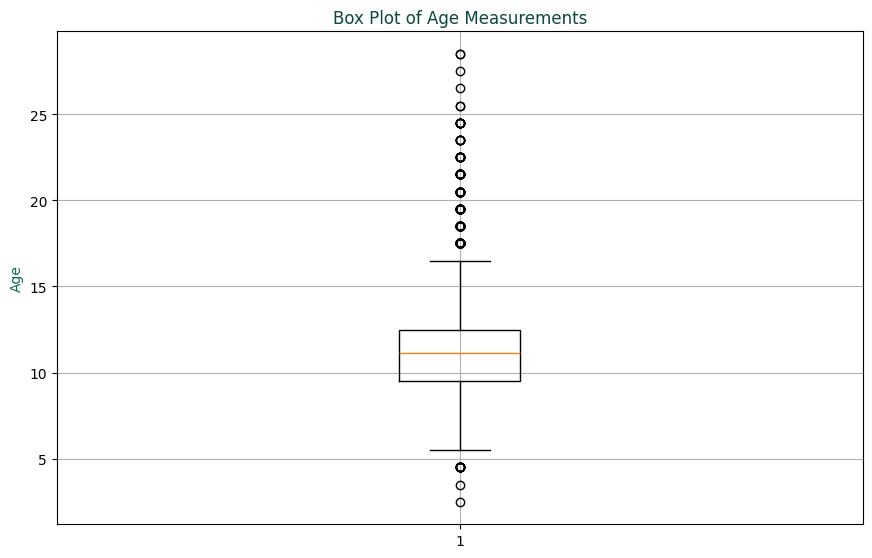

In [42]:
# Create a boxplot for age columns
plt.figure(figsize=(10.4,6.4))
plt.boxplot(num_df['Age (y)'])
plt.title('Box Plot of Age Measurements', color= "#0c483c")
plt.ylabel('Age', color='#0e6655')
plt.grid(True)
plt.show()

In [26]:
# Display the number of outliers detected
print('Total outlier values exist currently in our dataset:', outlier_age.shape[0])

Total outlier values exist currently in our dataset: 264


## TASK 3: Numerical analysis [10 marks]
a. Using NumPy techniques, pick two or more numerical valued columns in the dataset and find the mean, median and standard deviation of the data.

b. In your report.pdf file, add a section named “Numerical Analysis”. Include a table showing the generated statistical information. Add 3-4 sentences that describe what the numbers you have calculated above mean in the context of the data.

In [27]:
#Choosing four main numeric values for numerical analyis task:
main_cols = ['Height (mm)', 'Whole weight (g)', 'Age (y)', 'Rings']
print('Descriptive analysis table for 4 numerical variables:')
display(num_df[main_cols].describe())

Descriptive analysis table for 4 numerical variables:


,Height (mm),Whole weight (g),Age (y),Rings
count,4041.000000,4041.000000,4041.000000,4041.000000
mean,0.139347,0.827857,11.407931,9.910973
std,0.041908,0.484090,3.186140,3.191903
min,0.000000,0.002000,2.500000,1.000000
25%,0.115000,0.449000,9.500000,8.000000
50%,0.140000,0.808263,11.158494,9.733867
75%,0.165000,1.144500,12.500000,11.000000
max,1.130000,2.825500,28.500000,27.000000


In [28]:
# Numpy technique to find the mean, median and standard deviation
print('The average age of abalone:', num_df['Age (y)'].mean())
print('The median age of abalone:', num_df['Age (y)'].median())
print('The standard deviation of abalone age:',num_df['Age (y)'].std())

The average age of abalone: 11.407930576737304
The median age of abalone: 11.158493870402802
The standard deviation of abalone age: 3.1861398656505457


*** Some findings: 

Wide Range in Physical Size

For example, eight ranges from 0.002 g to 2.83 g, showing huge diversity.

==> Suggests a mix of very young/small and large/mature abalones. 

Once again, we focus on numerical data:

In [29]:
#Seperating those numerical data and focusing on unique values in each column
unique = num_df.nunique()
print('Display total unique values for those numerical data:')
display(unique)

Display total unique values for those numerical data:


Length (mm)            134
Diameter (mm)          111
Height (mm)             51
Whole weight (g)      2361
Shucked weight (g)    1491
Viscera weight (g)     870
Shell weight (g)       910
Rings                   28
Age (y)                 28
dtype: int64

### Key insight form Numerical features

There are a total of 4041 entries after the data cleaning task across all features. Among these, we can see that the numerical values have a wide range of distinct values as shown in the table, indicating the diversity and richness in the measurement and collection of physical body data for the abalones.

At the same time, it can be observed that "rings" and "age" have the same number of unique recorded values.

`Futher analysis` during task 4 intergrated with task 3.

## TASK 4: Simple plot [10 marks]

Write code to make a simple plot showing, for example, the relationship between two quantities in the data using a scatterplot, a time series using a lineplot, or the distribution of one or more parameters using a histogram plot. The description of each of the datasets includes some suggestions for relations you could use.

Ensure that your plot:

a.  Includes a legend (if there is more than one curve), and suitable axis labels indicating the quantity and any units.

b.  Uses axis scales that are set to reliably reveal any trends in the data (you may need to scale the data and adjust the unit labels if that is required to make an attractive plot).

c.  Is generally attractive with appropriate point size, line width and/or and colours.

d.  Is accompanied by a short analysis (2-3 sentences) of what the plot reveals about your data.

Pick up the key columns: Age, Whole weight, Shucked weight, Shell Weight

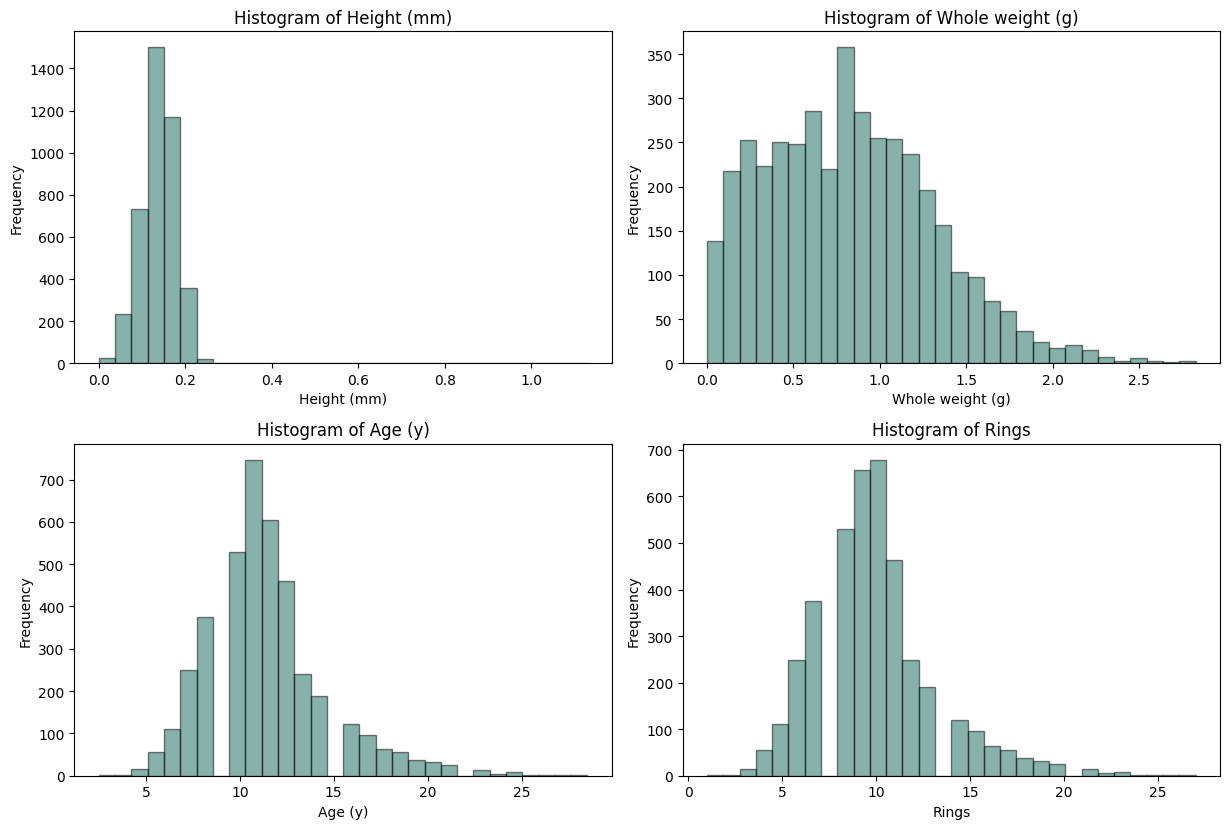

In [30]:
# Define the list of columns to plot
cols = [
    'Height (mm)', 'Length (mm)', 
    'Shucked weight (g)', 'Whole weight (g)', 
    'Age (y)', 'Rings']

# Set up the grid (2x2 for 4 columns)
fig, axes = plt.subplots(2, 2, figsize=(12.4, 8.4))

# Flatten the axes array for easy iteration
axes = axes.flatten()


# Plot each histogram
for i, col in enumerate(main_cols):
    axes[i].hist(
        num_df[col], bins=30, 
        color='#0e6655', edgecolor='black', 
        alpha = 0.5, lw= 2)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    

plt.tight_layout()
plt.show()


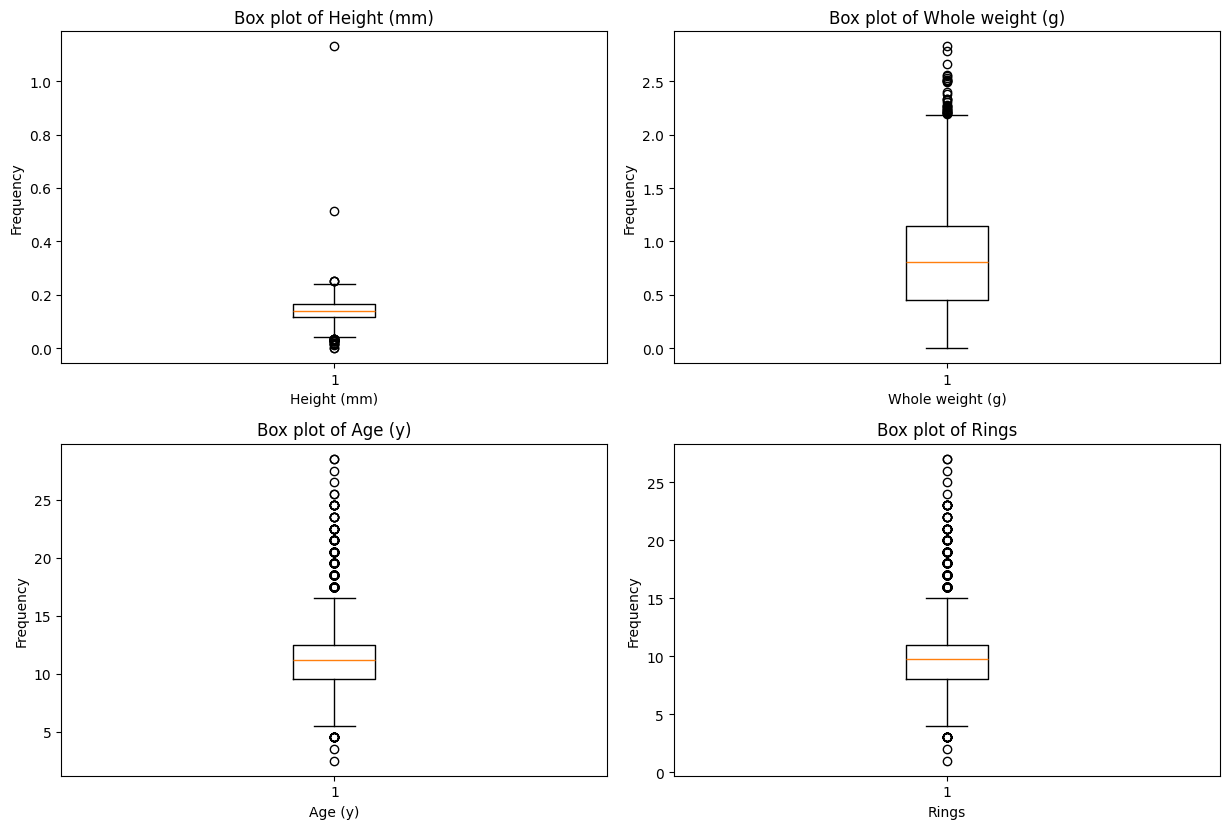

In [31]:
# Define the list of columns to plot
cols = [
    'Height (mm)', 'Length (mm)', 
    'Shucked weight (g)', 'Whole weight (g)', 
    'Age (y)', 'Rings']

# Set up the grid (2x2 for 4 columns)
fig, axes = plt.subplots(2, 2, figsize=(12.4, 8.4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each histogram
for i, col in enumerate(main_cols):
    axes[i].boxplot(num_df[col])
    axes[i].set_title(f'Box plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    

plt.tight_layout()
plt.show()

## Height: 

**> Distributions: significantly right-skewed shapes**
- Most of species in our sample are relatively short (small in sizes), while there are two species have longer height > 0.3mm (count as 2 species which have 1417 is 0.515mm and 2051 is 1.13mm (thelongest)) (there must be existing 2 outliers falling in left-hand side so that the x-axis is spreading like plot) => the apperance of two outliners show the potential data for rare large speciments. 

- The average height of abalone shells in our sample, depending on the species, are recorded as 0.139mm

- Most of the abalone in the sample have a height ranging from <span style="color: #16a085"> 0.1mm to 0.2mm </span>, with <span style="color: #16a085">a total of 3,140 specimens recorded </span>

- Notices that there are two species have <span style="color:rgb(7, 46, 38)"> the minimum height at 0.0mm </span>>, means that, potential data entry errors or missing measurements => requires neccessarily further exploration. 

In [32]:
# Two species are longer than 0.3mm
Long_species = num_df[num_df['Height (mm)'] > 0.3]
print('Two species is longer than 0.3mm:')
display(Long_species)

# Number of non-height hidden species that are recored 0.0mm in length
Missing_height = num_df[num_df['Height (mm)'] == 0.0]
print('Two species cannot find height')
display(Long_species)

Two species is longer than 0.3mm:


,Length (mm),Diameter (mm),Height (mm),Whole weight (g),Shucked weight (g),Viscera weight (g),Shell weight (g),Rings,Age (y)
1417,0.705,0.565,0.515,2.210,1.1075,0.4865,0.5120,10.0,11.5
2051,0.455,0.355,1.130,0.594,0.3320,0.1160,0.1335,8.0,9.5


Two species cannot find height


,Length (mm),Diameter (mm),Height (mm),Whole weight (g),Shucked weight (g),Viscera weight (g),Shell weight (g),Rings,Age (y)
1417,0.705,0.565,0.515,2.210,1.1075,0.4865,0.5120,10.0,11.5
2051,0.455,0.355,1.130,0.594,0.3320,0.1160,0.1335,8.0,9.5


## Whole weight

> Shape: moderately right-skewed distribution.

- Mean is approximately equal with median, recording 0.827 and 0.828 respectively, which indicating that the distribution of total weight is slightly positive skewed
 
- The IQR indicates that most surveyed abalones overall weigh between <span style="color: #138d75 "> 0.4g to 1.2g </span>

- Few outliers have significantly total weight greater than 2.0grams, peaking up to 2.8255 grams. 


In [33]:
num_df['Whole weight (g)'].max()

np.float64(2.8255)

## Age: 

Shape: <span style="color:rgb(14, 60, 51) "> Right-skewed distribution </span>, few outliers on the right hand side, meaning that there are much more young abalone than the older ones. 

**Key findings**

- Most of physical feature of the sureveyed abalone (Heigth, Weight, Length,) are witnessed <span style= 'color: lightseagreen'> right-skewed </span>, highlighting the attraction of smaller and lighter child abalones compared to fewer larger sample species. 

<span style= "color: tan"> Age versus Ring </span> 

The same patterns in histogram are witnessed in the distribution of `age` and `rings` seems reasonable as people usually calculate abalones age's using their shell ring. 


In [34]:
num_df.sort_values(by= 'Age (y)', inplace=True)
num_df[['Age (y)', 'Rings','Whole weight (g)']]

,Age (y),Rings,Whole weight (g)
236,2.5,1.0,0.0020
719,3.5,2.0,0.0150
2711,4.5,3.0,0.0315
720,4.5,3.0,0.0180
3801,4.5,3.0,0.0495
...,...,...,...
3149,25.5,24.0,1.9780
2201,26.5,25.0,1.4060
294,27.5,26.0,1.0575
2209,28.5,27.0,1.2125


Extracting from two column Age Rings, We can see that the variable 'Age' in this dataset has a certain correlation with the variable 'Rings', following a linear trend: 

`age = rings + 1.5`

<span style="color: #138d75 ">  That’s also why the plots generated from Age and Rings tend to show nearly identical patterns. </span>

**There is clearly a distinct pattern between rings and age — it’s evident that the more rings there are, the higher the age tends to be (which makes sense as it follows the linear equation mentioned above).**

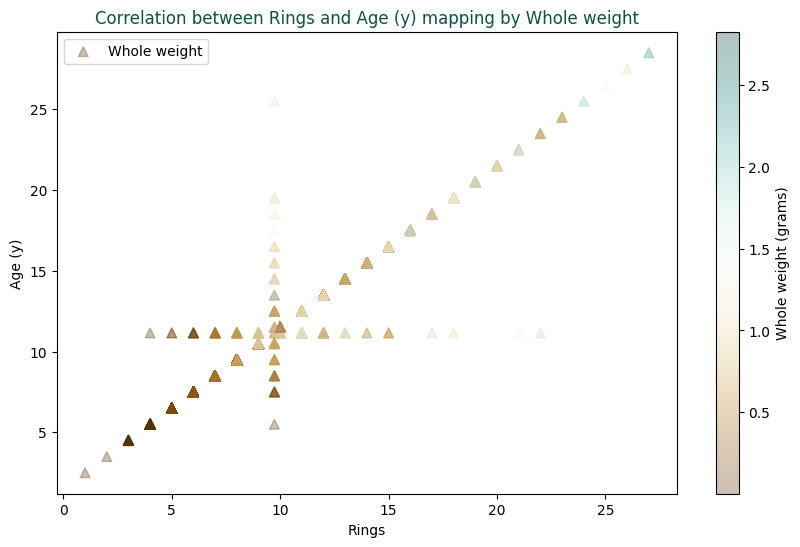

In [35]:
# plotting the scatter plot for rings and age 
plt.figure(figsize= (10,6))
plt.scatter(
    num_df['Rings'],num_df['Age (y)'],
    c= num_df['Whole weight (g)'], s= 50, 
    cmap= 'BrBG', marker = '^', 
    alpha= 0.3, label='Whole weight')
plt.xlabel('Rings')
plt.ylabel('Age (y)')
plt.colorbar(label='Whole weight (grams)')
plt.legend()
plt.title('Correlation between Rings and Age (y) mapping by Whole weight', color= '#0b5345')
plt.show()

# Ring analysis

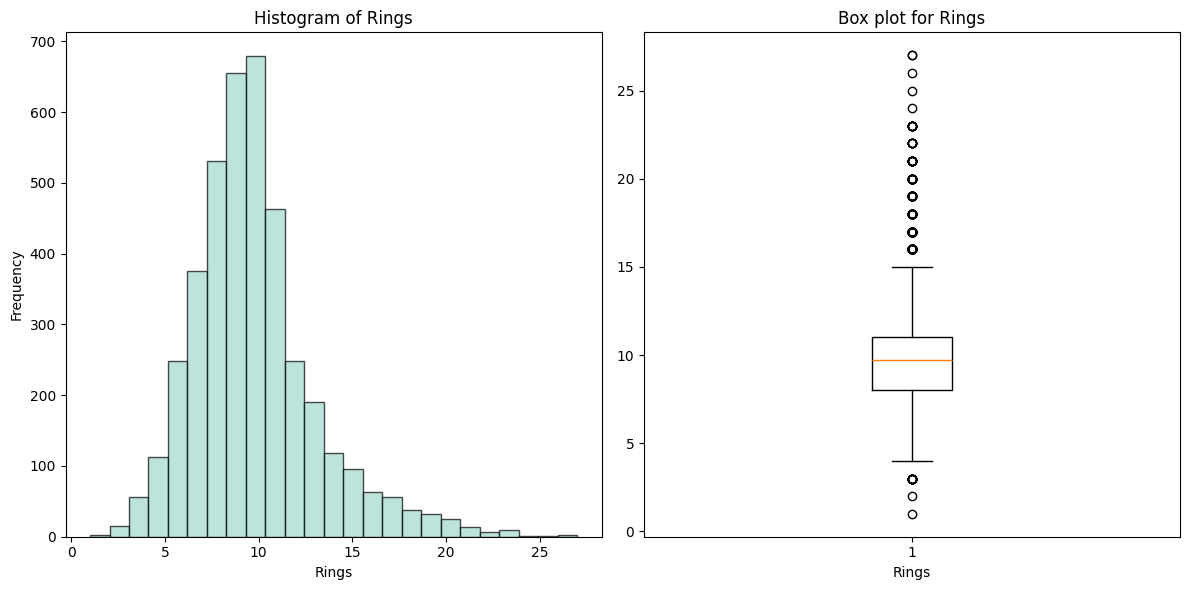

In [36]:
# creating sublots for rings
plt.figure(figsize= (12,6))

# histogram for rings in the first grid
plt.subplot(1,2,1)
plt.hist(
    num_df['Rings'], edgecolor= 'black', 
    bins = 25, lw= 2, alpha = 0.7, 
    color= '#a2d9ce')
plt.title('Histogram of Rings')
plt.xlabel('Rings')
plt.ylabel('Frequency')

# box plot for ring in the second grid
plt.subplot(1,2,2)
plt.boxplot(num_df['Rings'])
plt.title('Box plot for Rings')
plt.xlabel('Rings')

plt.tight_layout()
plt.show()

- the most frequence observed around <span style="color: #138d75 ">  8-10 rings </span>, concluding that this might be the most common age group. 

- The median also witnessed the same data for the number of rings appears to be around <span style="color: #138d75 ">  9-10 rings </span> 

- The box plot support the evidience that most of data concentrated on the left-hand side while several outliers exist on the right side, and <span style="color:rgb(201, 59, 16) ">  there is a significantly decline in the number of abalone as the rings increased </span>

# TASK 5: Multi-variable plot [10 marks]
Considering the set of variables in your dataset, select 3 or 4 variables to explore their relationship in a plot that combines multi-variable plot techniques (for example, scatter dot size and/or colour as well as position)

a. Your plot should be included in the report.pdf and:

i. Include a legend (if there is more than one curve/colour etc.), and suitable axis labels indicating the quantity and any units

ii. Uses axis scales that are set to reliably reveal any trends in the data (you may need to scale the data and adjust the unit labels if that is required to make an attractive plot)

iii. Be generally attractive with appropriate point size, line width and/or and colours.

b. Your report.pdf should include a paragraph explaining what kind of potential relationships you are choosing to investigate. Add this in a section called “Multi-variable plot part b”

c. Your report.pdf contains a short analysis (2-3 sentences) of what the plot reveals about your data and draw conclusions from your plot. Add this in a section called “Multi-variable plot part c”

### GOALS: DISTRIBUTION OF AGE BY SEX 

3 subtegories gender of abalone: MFI


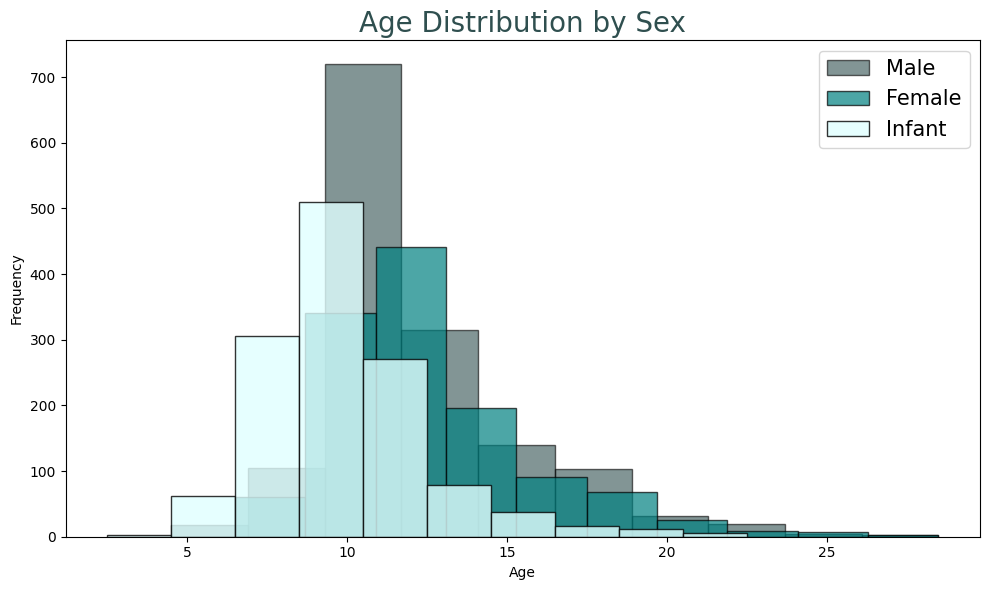

In [37]:
# Take a look at distinct sex 
print('3 subtegories gender of abalone:',marine_df['Sex'].unique().sum())


#Filter age by sex
M_ages = marine_df[marine_df['Sex'] == 'M']['Age (y)']
F_ages = marine_df[marine_df['Sex'] == 'F']['Age (y)']
I_ages = marine_df[marine_df['Sex'] == 'I']['Age (y)']

# Ploting 
plt.figure(figsize=(10, 6))
plt.hist(M_ages, bins= 10, alpha=0.6, label='Male', color= 'darkslategrey', edgecolor='black')
plt.hist(F_ages, bins= 10, alpha=0.7, label='Female',color= 'teal', edgecolor='black')
plt.hist(I_ages, bins= 10, alpha=0.8, label='Infant',color= 'lightcyan', edgecolor='black')
plt.title('Age Distribution by Sex', size= 20, color= 'darkslategrey')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(fontsize= 15)
plt.tight_layout()
plt.show()

KEY FINDINGL: 


- The distribution for all gender peak between age 9-11, indicating that the target age for commercial abalone seems to fall in this range.

- Infants (showed image) is likely to be the majority in the younger age range from  4-9.

- Males (dark gray) and females (teal) peak slightly later (10–13).

- After age 13:

>> Female frequency appears more evenly spread out than male.

>> Females tend to have greater longevity or are sampled across a broader age span.

- All groups decrease in the number of abalone from 15 onward. 



### TASK 6: Extension task [10 marks]
Extend the analysis of your previous investigation to incorporate the use of an untaught part of a library that we have discussed in class, which demonstrates further mastery and understanding of the library.

For example, you might apply a new statistical technique or use a type of plot that we have not discussed previously.

a. Write the code demonstrating the additional feature(s).

b. Your report.pdf should include an explanation of why your approach adds value to the analysis and what further insights it reveals about the data.

c. Your report.pdf should include a description of how your analysis goes beyond what was taught in class.


### Goal: FIND OUT THE `Features of abalone` GROUP BY `3 DISTINCT GROUP OF GENDER`

In [38]:
marine_df.columns

Index(['Sex', 'Length (mm)', 'Diameter (mm)', 'Height (mm)',
       'Whole weight (g)', 'Shucked weight (g)', 'Viscera weight (g)',
       'Shell weight (g)', 'Rings', 'Age (y)'],
      dtype='object')

In [39]:
xyz = marine_df.groupby('Sex').mean().reset_index()


In [40]:
# seperating each group gender
gender_group = marine_df.groupby('Sex')[['Age (y)', 'Whole weight (g)']].agg(['count','mean']).reset_index()


# rename column for clarifying


# Calculate the Relative percentage by creating new column 'Relative percentag3e for df
gender_group['Relative percentage'] = gender_group['Age (y)', 'count']/ gender_group['Age (y)', 'count'].sum() *100
gender_group.columns


MultiIndex([(                'Sex',      ''),
            (            'Age (y)', 'count'),
            (            'Age (y)',  'mean'),
            (   'Whole weight (g)', 'count'),
            (   'Whole weight (g)',  'mean'),
            ('Relative percentage',      '')],
           )

In [ ]:
# gender_df.columns

NameError: name 'gender_df' is not defined

/var/folders/fs/vpv7t9012wxdx__nwt82lmpm0000gn/T/ipykernel_69160/1349285545.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


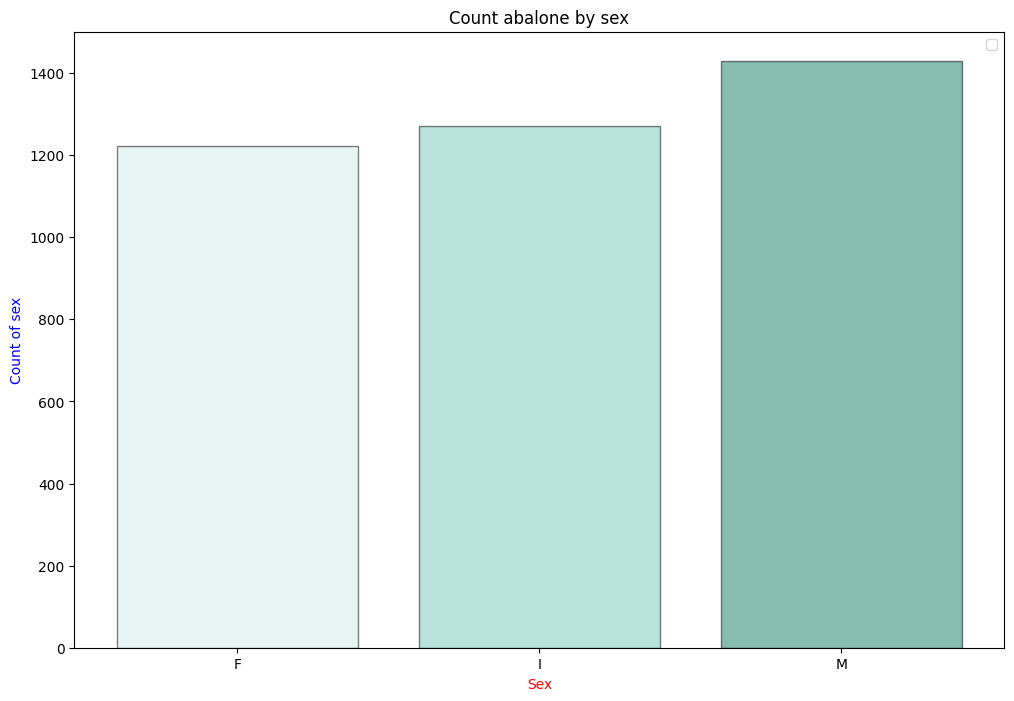

In [ ]:
#Plot bar chart of counts from matplotlib
plt.figure(figsize=(12,8))
plt.bar(
    gender_group['Sex',''], gender_group['Age (y)', 'count'], 
    color=['#d0ece7','#73c6b6','#117a65'], 
    alpha= 0.5, edgecolor= 'black')
plt.xlabel('Sex', color= 'r')
plt.ylabel('Count of sex', color= 'b')
plt.legend()
plt.title('Count abalone by sex')
plt.show()
